In [1]:
from torchvision import transforms
from PIL import Image
import os.path as path
import numpy as np
import torch as t

In [2]:
imgpath = path.expanduser("~/ml-data/plant-pathology/cache/250x250/Train_0.jpg")
img = Image.open(imgpath)

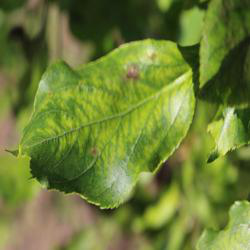

In [3]:
img

In [4]:
ary = np.asarray(img)

In [5]:
red_mean = np.mean(ary[:, :, 0])
red_std = np.std(ary[:, :, 0])

green_mean = np.mean(ary[:, :, 1])
green_std = np.std(ary[:, :, 1])

blue_mean = np.mean(ary[:, :, 2])
blue_std = np.std(ary[:, :, 2])

print(red_mean, red_std)
print(green_mean, green_std)
print(blue_mean, blue_std)


109.912144 47.17965028826797
125.871456 47.485385924935514
54.601744 33.566077640356845


In [6]:
means = (red_mean, green_mean, blue_mean)
stds = (red_std, green_std, blue_std)

In [7]:
to_tensor = transforms.ToTensor()
normalize = transforms.Normalize(means, stds)

In [8]:
img_1 = to_tensor(img)

In [9]:
img_1.shape

torch.Size([3, 250, 250])

In [10]:
print(t.mean(img_1[0]), t.std(img_1[0]))
print(t.mean(img_1[1]), t.std(img_1[1]))
print(t.mean(img_1[2]), t.std(img_1[2]))

tensor(0.4310) tensor(0.1850)
tensor(0.4936) tensor(0.1862)
tensor(0.2141) tensor(0.1316)


$$
A, X, B \\
a, x, b \\
\frac{(x - a)}{(b - a)} = \frac{(X - A)}{(B - A)} \\
x - a = \frac{(X - A)(b - a)}{(B - A)} \\
x = a + \frac{(X - A)(b - a)}{(B - A)} \\
$$

$
A = 0 \\
B = 255 \\
a = 0.0 \\
b = 1.0 \\
x = \frac{X}{255}
$

In [11]:
np.min(ary)

0

In [12]:
np.max(ary)

249

In [13]:
means = (red_mean/255.0, green_mean/255.0, blue_mean/255.0)
stds = (red_std/255.0, green_std/255.0, blue_std/255.0)

In [14]:
print(means)

(0.4310280156862745, 0.4936135529411764, 0.21412448627450978)


In [15]:
print(stds)

(0.1850182364245803, 0.18621719970562947, 0.13163167702100723)


In [16]:
normalize = transforms.Normalize(means, stds)

In [17]:
img_2 = normalize(img_1)

In [18]:
print(t.mean(img_2[0]), t.std(img_2[0]))
print(t.mean(img_2[1]), t.std(img_2[1]))
print(t.mean(img_2[2]), t.std(img_2[2]))

tensor(9.3750e-08) tensor(1.0000)
tensor(1.3281e-07) tensor(1.0000)
tensor(5.4688e-08) tensor(1.0000)


In [19]:
norm_red = (img_1[0] - 0.4310280156862745)/0.1850182364245803

In [20]:
t.mean(norm_red)

tensor(9.3750e-08)

In [21]:
t.std(norm_red)

tensor(1.0000)

In [22]:
xform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(means, stds)])

In [23]:
final_img = xform(img)

In [24]:
img_2[0][0, :10]

tensor([-1.4818, -1.5030, -1.4606, -1.4394, -1.3970, -1.3970, -1.3759, -1.3759,
        -1.2911, -1.2911])

In [25]:
final_img[0][0, :10]

tensor([-1.4818, -1.5030, -1.4606, -1.4394, -1.3970, -1.3970, -1.3759, -1.3759,
        -1.2911, -1.2911])

In [26]:
print(t.mean(final_img[0]), t.std(final_img[0]))
print(t.mean(final_img[1]), t.std(final_img[1]))
print(t.mean(final_img[2]), t.std(final_img[2]))

tensor(9.3750e-08) tensor(1.0000)
tensor(1.3281e-07) tensor(1.0000)
tensor(5.4688e-08) tensor(1.0000)


In [27]:
len(img.getdata(band=0))

62500

In [28]:
250*250

62500

In [29]:
np.asarray(img.getdata(band=0), dtype=np.int8)[:10]

array([40, 39, 41, 42, 44, 44, 45, 45, 49, 49], dtype=int8)

In [30]:
list(img.getdata(band=0))[:10]

[40, 39, 41, 42, 44, 44, 45, 45, 49, 49]

In [31]:
ary = np.array([1, 2, 3], dtype=np.uint8)

In [32]:
ary**2

array([1, 4, 9], dtype=uint8)

In [33]:
np.sum(ary ** 2)

14

In [34]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [35]:
reds = np.asarray(img.getdata(band=0))

In [36]:
reds

array([ 40,  39,  41, ..., 196, 191, 198])

In [37]:
sum_red = np.sum(reds)

In [38]:
sum_red

6869509

In [39]:
np.sum(reds ** 2)

894162425

In [40]:
red_sum = 0
red2_sum = 0
for red in img.getdata(band=0):
    red_sum += red
    red2_sum += red ** 2

In [41]:
red_sum

6869509

In [42]:
red2_sum

894162425

In [59]:
r = t.Tensor([
    [10, 20],
    [30, 40]
])
g = t.Tensor([
    [11, 21],
    [31, 41]
])
b = t.Tensor([
    [12, 22],
    [32, 42]
])

In [64]:
tp = t.stack((r, g, b)).to(t.int8)

In [65]:
tp.shape

torch.Size([3, 2, 2])

In [66]:
tp[0]

tensor([[10, 20],
        [30, 40]], dtype=torch.int8)

In [74]:
tp[1]

tensor([[11, 21],
        [31, 41]], dtype=torch.int8)

In [78]:
tp2 = tp.permute(1, 2, 0)

In [79]:
tp2.shape

torch.Size([2, 2, 3])

In [80]:
tp2[:, :, 0]

tensor([[10, 20],
        [30, 40]], dtype=torch.int8)

In [81]:
tp2[:, :, 1]

tensor([[11, 21],
        [31, 41]], dtype=torch.int8)

In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

In [3]:
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)

In [14]:
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr', labels=[0, 1, 2])

0.9913333333333334

In [6]:
probs = clf.predict_proba(X)

In [7]:
probs.shape

(150, 3)

In [8]:
y.shape

(150,)

In [11]:
np.unique(y)

array([0, 1, 2])

In [12]:
probs[0, :]

array([8.78030305e-01, 1.21958900e-01, 1.07949250e-05])

In [13]:
np.sum(probs[0, :])

1.0